In [2]:
from pathlib import Path
from scenedetect import detect, open_video, AdaptiveDetector, ContentDetector
import matplotlib.pyplot as plt
import numpy as np
import allin1

/home/keli/miniconda3/envs/videoedit/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
video_dir_path = Path(".") / "data/videos/mashup/WBPQdPqHSqo"
video_path = video_dir_path / "video.mp4"
random_video_path = Path(".") / "output" / "videos" / "random"/ "video.mp4"

In [4]:
result = allin1.analyze(str(video_path))

=> Found 0 tracks already analyzed and 1 tracks to analyze.
=> Found 0 tracks already demixed, 1 to demix.
Selected model is a bag of 1 models. You will see that many progress bars per track.
Separated tracks will be stored in /home/keli/VideoEdit/demix/htdemucs
Separating track /data/keli/VideoEdit/data/videos/mashup/WBPQdPqHSqo/video.mp4


100%|██████████████████████████████████████████████| 163.79999999999998/163.79999999999998 [00:03<00:00, 53.53seconds/s]


=> Found 0 spectrograms already extracted, 1 to extract.


Analyzing video.mp4: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]


In [5]:
def create_pr_markers_csv(data):
    for name, color, timestamps in data:
        for timestamp in timestamps:
            print(f"{timestamp} {timestamp} {color} segmentation {name}")
    

In [19]:
scene_list = detect(str(video_path), AdaptiveDetector(min_scene_len=5))
scene_starts = np.array([s[1].get_seconds() for s in scene_list])

In [7]:
beats = np.array(result.beats)

# searchsorted 相当于 bisect 的数组版
indices = np.searchsorted(beats, scene_starts, side='left')

# 处理超出范围的情况：如果 index == len(beats)，说明比所有节拍都晚，设为 -1
next_beat = np.where(indices < len(beats), indices, -1).tolist()

In [8]:
beat_time = [beats[i] - (beats[i-1] if i != 0 else 0) for i in range(len(beats))]

position = np.array([(beats[i] - s) / beat_time[i] for s, i in zip(scene_starts, next_beat) if i != -1 and beat_time[i] < 2])

In [9]:
sum(position < 0.2) / len(scene_starts)

np.float64(0.3532934131736527)

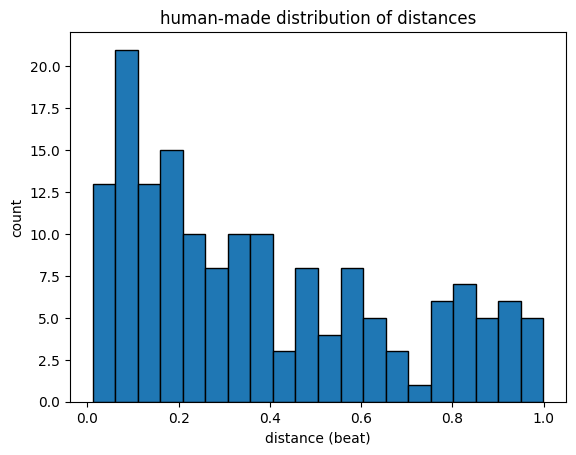

In [10]:
# 绘制距离分布的直方图
plt.hist(position, bins=20, edgecolor='black')
plt.title('human-made distribution of distances')
plt.xlabel('distance (beat)')
plt.ylabel('count')
plt.show()

In [20]:
create_pr_markers_csv([
    ("scene", "red", scene_starts),
    ("beat", "green", result.beats)
])

4.004 4.004 red segmentation scene
4.629625 4.629625 red segmentation scene
5.630624999999999 5.630624999999999 red segmentation scene
9.926583333333333 9.926583333333333 red segmentation scene
11.094416666666666 11.094416666666666 red segmentation scene
12.26225 12.26225 red segmentation scene
12.887875 12.887875 red segmentation scene
13.513499999999999 13.513499999999999 red segmentation scene
14.305958333333333 14.305958333333333 red segmentation scene
14.973291666666666 14.973291666666666 red segmentation scene
15.598916666666666 15.598916666666666 red segmentation scene
16.307958333333332 16.307958333333332 red segmentation scene
16.93358333333333 16.93358333333333 red segmentation scene
17.68433333333333 17.68433333333333 red segmentation scene
18.393375 18.393375 red segmentation scene
19.06070833333333 19.06070833333333 red segmentation scene
19.728041666666666 19.728041666666666 red segmentation scene
20.270249999999997 20.270249999999997 red segmentation scene
20.93758333333

In [21]:
import random
scene_starts = [random.random() * beats[-1] for i in range(10000)]

In [22]:
beats = np.array(result.beats)

# searchsorted 相当于 bisect 的数组版
indices = np.searchsorted(beats, scene_starts, side='left')

# 处理超出范围的情况：如果 index == len(beats)，说明比所有节拍都晚，设为 -1
next_beat = np.where(indices < len(beats), indices, -1).tolist()

In [23]:
beat_time = [beats[i] - (beats[i-1] if i != 0 else 0) for i in range(len(beats))]

position = np.array([(beats[i] - s) / beat_time[i] for s, i in zip(scene_starts, next_beat) if i != -1 and beat_time[i] < 2])

In [24]:
sum(position < 0.2) / len(scene_starts)

np.float64(0.1901)

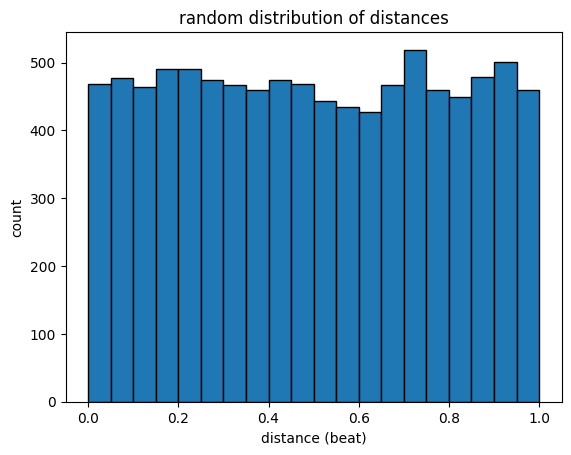

In [25]:
# 绘制距离分布的直方图
plt.hist(position, bins=20, edgecolor='black')
plt.title('random distribution of distances')
plt.xlabel('distance (beat)')
plt.ylabel('count')
plt.show()